# Building an SVM Classifier for MNIST with Hyperparameter Tuning and Comparative Analysis

## Fetch the Dataset

In [1]:
import sklearn
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
y.shape

(70000,)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_opt, y_opt = X[:15000], y[:15000]

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_opt_scaled = scaler.fit_transform(X_opt)

## Hyperparameter Tuning of the SVM classifier

### Random Search

In [7]:
from sklearn.svm import SVC
svm_classifier = SVC()

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint, loguniform
param_distributions_poly = {
    'kernel': ['poly'],
    'degree': randint(2, 6),  
    'C': uniform(0.1, 10),    
    'coef0': uniform(0, 1)   
}


param_distributions_rbf = {
    'kernel': ['rbf'],
    'C': uniform(0.1, 10),   
    'gamma': loguniform(1e-4, 1e1)
}

param_distributions_linear = {
    'kernel': ['linear'],
    'C': uniform(0.1, 10)
}

In [9]:
random_search_svm_poly = RandomizedSearchCV(
    estimator=svm_classifier,
    param_distributions=param_distributions_poly,
    n_iter=20,                
    scoring='accuracy',       
    cv=3,                     
    random_state=42,
    verbose=3
)

In [10]:
random_search_svm_rbf = RandomizedSearchCV(
    estimator=svm_classifier,
    param_distributions=param_distributions_rbf,
    n_iter=20,                
    scoring='accuracy',      
    cv=3,                     
    random_state=42,
    verbose=3
)

In [11]:
random_search_svm_linear = RandomizedSearchCV(
    estimator=svm_classifier,
    param_distributions=param_distributions_linear,
    n_iter=20,                
    scoring='accuracy',      
    cv=3,                     
    random_state=42,
    verbose=3
)

In [12]:
random_search_svm_poly.fit(X_opt_scaled, y_opt)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=3.845401188473625, coef0=0.9507143064099162, degree=4, kernel=poly;, score=0.964 total time=   7.9s
[CV 2/3] END C=3.845401188473625, coef0=0.9507143064099162, degree=4, kernel=poly;, score=0.950 total time=   7.8s
[CV 3/3] END C=3.845401188473625, coef0=0.9507143064099162, degree=4, kernel=poly;, score=0.958 total time=   8.6s
[CV 1/3] END C=7.896910002727692, coef0=0.596850157946487, degree=3, kernel=poly;, score=0.965 total time=   8.1s
[CV 2/3] END C=7.896910002727692, coef0=0.596850157946487, degree=3, kernel=poly;, score=0.951 total time=   8.0s
[CV 3/3] END C=7.896910002727692, coef0=0.596850157946487, degree=3, kernel=poly;, score=0.959 total time=   8.0s
[CV 1/3] END C=1.6599452033620266, coef0=0.05808361216819946, degree=5, kernel=poly;, score=0.778 total time=  34.6s
[CV 2/3] END C=1.6599452033620266, coef0=0.05808361216819946, degree=5, kernel=poly;, score=0.742 total time=  35.1s
[CV 3/3] END C=1.6

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001495E5A2650>,
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001495E5A3280>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001495E22FE20>,
                                        'kernel': ['poly']},
                   random_state=42, scoring='accuracy', verbose=3)

In [13]:
import pandas as pd
rnd_search_poly_results = random_search_svm_poly.cv_results_
results_rnd_poly = [
    {'Score': mean_score, **params} 
    for mean_score, params in zip(rnd_search_poly_results["mean_test_score"], rnd_search_poly_results["params"])
]
rnd_search_poly_results_df = pd.DataFrame(results_rnd_poly)
rnd_search_poly_results_df_sorted = rnd_search_poly_results_df.sort_values(by='Score', ascending=False)
rnd_search_poly_results_df_sorted.to_csv('output/rnd_svm_poly_sorted.csv', index=False)
rnd_search_poly_results_df_sorted

,Score,C,coef0,degree,kernel
9,0.963000,9.837555,0.232771,3,poly
10,0.961933,7.951760,0.199674,4,poly
18,0.961400,6.725223,0.311711,3,poly
6,0.960867,1.934045,0.304242,3,poly
17,0.960133,1.833647,0.391061,3,poly
16,0.959667,1.320382,0.495177,4,poly
12,0.959267,6.175449,0.170524,4,poly
4,0.958733,0.305845,0.969910,5,poly
1,0.958200,7.896910,0.596850,3,poly
14,0.958200,8.183973,0.304614,2,poly


In [14]:
random_search_svm_rbf.fit(X_opt_scaled, y_opt)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=3.845401188473625, gamma=5.669849511478847, kernel=rbf;, score=0.113 total time= 1.3min
[CV 2/3] END C=3.845401188473625, gamma=5.669849511478847, kernel=rbf;, score=0.113 total time= 1.3min
[CV 3/3] END C=3.845401188473625, gamma=5.669849511478847, kernel=rbf;, score=0.113 total time= 1.2min
[CV 1/3] END C=7.41993941811405, gamma=0.09846738873614563, kernel=rbf;, score=0.178 total time= 1.1min
[CV 2/3] END C=7.41993941811405, gamma=0.09846738873614563, kernel=rbf;, score=0.179 total time= 1.1min
[CV 3/3] END C=7.41993941811405, gamma=0.09846738873614563, kernel=rbf;, score=0.175 total time= 1.2min
[CV 1/3] END C=1.6601864044243653, gamma=0.000602521573620386, kernel=rbf;, score=0.944 total time=  18.0s
[CV 2/3] END C=1.6601864044243653, gamma=0.000602521573620386, kernel=rbf;, score=0.932 total time=  18.2s
[CV 3/3] END C=1.6601864044243653, gamma=0.000602521573620386, kernel=rbf;, score=0.933 total time=  18.

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001495E22FCD0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001495E5A36D0>,
                                        'kernel': ['rbf']},
                   random_state=42, scoring='accuracy', verbose=3)

In [15]:
rnd_search_rbf_results = random_search_svm_rbf.cv_results_
results_rnd_rbf = [
    {'Score': mean_score, **params} 
    for mean_score, params in zip(rnd_search_rbf_results["mean_test_score"], rnd_search_rbf_results["params"])
]
rnd_search_rbf_results_df = pd.DataFrame(results_rnd_rbf)
rnd_search_rbf_results_df_sorted = rnd_search_rbf_results_df.sort_values(by='Score', ascending=False)
rnd_search_rbf_results_df_sorted.to_csv('output/rnd_svm_rbf_sorted.csv', index=False)
rnd_search_rbf_results_df_sorted

,Score,C,gamma,kernel
6,0.947533,8.424426,0.001153,rbf
15,0.947133,6.175449,0.000712,rbf
10,0.943667,6.218529,0.000498,rbf
7,0.940733,1.918250,0.000826,rbf
2,0.936400,1.660186,0.000603,rbf
18,0.934800,3.146138,0.000308,rbf
9,0.934067,4.419450,0.002859,rbf
14,0.933600,6.024146,0.000171,rbf
11,0.858400,3.021446,0.006789,rbf
19,0.662133,6.942330,0.015877,rbf


In [16]:
random_search_svm_linear.fit(X_opt_scaled, y_opt)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=3.845401188473625, kernel=linear;, score=0.914 total time=   6.0s
[CV 2/3] END C=3.845401188473625, kernel=linear;, score=0.910 total time=   5.7s
[CV 3/3] END C=3.845401188473625, kernel=linear;, score=0.898 total time=   5.8s
[CV 1/3] END .C=9.60714306409916, kernel=linear;, score=0.914 total time=   5.7s
[CV 2/3] END .C=9.60714306409916, kernel=linear;, score=0.910 total time=   5.7s
[CV 3/3] END .C=9.60714306409916, kernel=linear;, score=0.898 total time=   5.5s
[CV 1/3] END .C=7.41993941811405, kernel=linear;, score=0.914 total time=   5.7s
[CV 2/3] END .C=7.41993941811405, kernel=linear;, score=0.910 total time=   5.6s
[CV 3/3] END .C=7.41993941811405, kernel=linear;, score=0.898 total time=   5.6s
[CV 1/3] END C=6.086584841970366, kernel=linear;, score=0.914 total time=   5.7s
[CV 2/3] END C=6.086584841970366, kernel=linear;, score=0.910 total time=   5.8s
[CV 3/3] END C=6.086584841970366, kernel=linear;

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001495E22FBE0>,
                                        'kernel': ['linear']},
                   random_state=42, scoring='accuracy', verbose=3)

In [17]:
rnd_search_linear_results = random_search_svm_linear.cv_results_
results_rnd_linear = [
    {'Score': mean_score, **params} 
    for mean_score, params in zip(rnd_search_linear_results["mean_test_score"], rnd_search_linear_results["params"])
]
rnd_search_linear_results_df = pd.DataFrame(results_rnd_linear)
rnd_search_linear_results_df_sorted = rnd_search_linear_results_df.sort_values(by='Score', ascending=False)
rnd_search_linear_results_df_sorted.to_csv('output/rnd_svm_linear_sorted.csv', index=False)
rnd_search_linear_results_df_sorted

,Score,C,kernel
10,0.908800,0.305845,linear
1,0.907533,9.607143,linear
18,0.907533,4.419450,linear
17,0.907533,5.347564,linear
16,0.907533,3.142422,linear
15,0.907533,1.934045,linear
14,0.907533,1.918250,linear
13,0.907533,2.223391,linear
12,0.907533,8.424426,linear
11,0.907533,9.799099,linear


### Grid Search

In [22]:
from sklearn.model_selection import GridSearchCV
param_distributions_poly_grid = [{
    'C': [10.0, 25.0, 50.0],
    'coef0': [0.25, 0.4, 0.5],
    'degree': [3],
    'kernel': ['poly']
}]

grid_search_poly = GridSearchCV(svm_classifier, param_distributions_poly_grid, cv=5, verbose=3)
grid_search_poly.fit(X_opt_scaled, y_opt)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END C=10.0, coef0=0.25, degree=3, kernel=poly;, score=0.967 total time=  10.6s
[CV 2/5] END C=10.0, coef0=0.25, degree=3, kernel=poly;, score=0.971 total time=  11.4s
[CV 3/5] END C=10.0, coef0=0.25, degree=3, kernel=poly;, score=0.959 total time=  11.2s
[CV 4/5] END C=10.0, coef0=0.25, degree=3, kernel=poly;, score=0.967 total time=  11.3s
[CV 5/5] END C=10.0, coef0=0.25, degree=3, kernel=poly;, score=0.966 total time=  10.6s
[CV 1/5] END C=10.0, coef0=0.4, degree=3, kernel=poly;, score=0.962 total time=  10.2s
[CV 2/5] END C=10.0, coef0=0.4, degree=3, kernel=poly;, score=0.969 total time=  10.4s
[CV 3/5] END C=10.0, coef0=0.4, degree=3, kernel=poly;, score=0.956 total time=  10.0s
[CV 4/5] END C=10.0, coef0=0.4, degree=3, kernel=poly;, score=0.966 total time=  10.4s
[CV 5/5] END C=10.0, coef0=0.4, degree=3, kernel=poly;, score=0.964 total time=  10.0s
[CV 1/5] END C=10.0, coef0=0.5, degree=3, kernel=poly;, score=0.9

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [10.0, 25.0, 50.0], 'coef0': [0.25, 0.4, 0.5],
                          'degree': [3], 'kernel': ['poly']}],
             verbose=3)

In [23]:
grid_search_poly_results = grid_search_poly.cv_results_
results_grid_poly = [
    {'Score': mean_score, **params} 
    for mean_score, params in zip(grid_search_poly_results["mean_test_score"], grid_search_poly_results["params"])
]
grid_search_poly_results_df = pd.DataFrame(results_grid_poly)
grid_search_poly_results_df_sorted = grid_search_poly_results_df.sort_values(by='Score', ascending=False)
grid_search_poly_results_df_sorted.to_csv('output/grid_svm_poly_sorted.csv', index=False)
grid_search_poly_results_df_sorted

,Score,C,coef0,degree,kernel
0,0.965867,10.0,0.25,3,poly
6,0.965867,50.0,0.25,3,poly
3,0.965800,25.0,0.25,3,poly
1,0.963400,10.0,0.40,3,poly
7,0.963333,50.0,0.40,3,poly
4,0.963267,25.0,0.40,3,poly
2,0.961200,10.0,0.50,3,poly
5,0.961067,25.0,0.50,3,poly
8,0.961067,50.0,0.50,3,poly


In [26]:
param_distributions_rbf_grid = [{
    'kernel': ['rbf'],
    'C': [10, 25, 50],   
    'gamma': [0.0001, 0.001, 0.01]
}]

grid_search_rbf = GridSearchCV(svm_classifier, param_distributions_rbf_grid, cv=5, verbose=3)
grid_search_rbf.fit(X_opt_scaled, y_opt)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.937 total time=  13.3s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.943 total time=  13.9s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.927 total time=  13.5s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.938 total time=  13.8s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.924 total time=  13.2s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.952 total time=  16.4s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.955 total time=  17.2s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.945 total time=  16.6s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.954 total time=  16.7s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.945 total time=  16.4s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.804 total time= 1.1min
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [10, 25, 50], 'gamma': [0.0001, 0.001, 0.01],
                          'kernel': ['rbf']}],
             verbose=3)

In [27]:
grid_search_rbf_results = grid_search_rbf.cv_results_
results_grid_rbf = [
    {'Score': mean_score, **params} 
    for mean_score, params in zip(grid_search_rbf_results["mean_test_score"], grid_search_rbf_results["params"])
]
grid_search_rbf_results_df = pd.DataFrame(results_grid_rbf)
grid_search_rbf_results_df_sorted = grid_search_rbf_results_df.sort_values(by='Score', ascending=False)
grid_search_rbf_results_df_sorted.to_csv('output/grid_svm_rbf_sorted.csv', index=False)
grid_search_rbf_results_df_sorted

,Score,C,gamma,kernel
1,0.950000,10,0.0010,rbf
4,0.948667,25,0.0010,rbf
7,0.948600,50,0.0010,rbf
3,0.937400,25,0.0001,rbf
6,0.937400,50,0.0001,rbf
0,0.934000,10,0.0001,rbf
2,0.790200,10,0.0100,rbf
5,0.790200,25,0.0100,rbf
8,0.790200,50,0.0100,rbf


In [60]:
param_distributions_linear_grid = [{
    'kernel': ['linear'],
    'C': [0.1, 0.001, 1, 10]
}]

grid_search_linear = GridSearchCV(svm_classifier, param_distributions_linear_grid, cv=5, verbose=3)
grid_search_linear.fit(X_opt_scaled, y_opt)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.915 total time=   6.3s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.924 total time=   6.7s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.911 total time=   6.6s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.925 total time=   6.4s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.899 total time=   6.2s
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.932 total time=  10.9s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.935 total time=  10.9s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.922 total time=  10.9s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.932 total time=  11.3s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.915 total time=  11.3s
[CV 1/5] END ................C=1, kernel=linear;, score=0.908 total time=   7.1s
[CV 2/5] END ................C=1, kernel=linear;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.001, 1, 10], 'kernel': ['linear']}],
             verbose=3)

In [61]:
grid_search_linear_results = grid_search_linear.cv_results_
results_grid_linear = [
    {'Score': mean_score, **params} 
    for mean_score, params in zip(grid_search_linear_results["mean_test_score"], grid_search_linear_results["params"])
]
grid_search_linear_results_df = pd.DataFrame(results_grid_linear)
grid_search_linear_results_df_sorted = grid_search_linear_results_df.sort_values(by='Score', ascending=False)
grid_search_linear_results_df_sorted.to_csv('output/grid_svm_linear_sorted.csv', index=False)
grid_search_linear_results_df_sorted

,Score,C,kernel
1,0.927400,0.001,linear
0,0.914733,0.100,linear
2,0.906933,1.000,linear
3,0.906933,10.000,linear


## Find best hyperparameters with Grid Search

### KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn_classifier = [{'weights': ["uniform", "distance"], 
                            'n_neighbors': [3, 4, 5, 6]}]

knn_classifier_grid = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_classifier_grid, param_grid_knn_classifier, cv=5, verbose=3)
grid_search_knn.fit(X_opt_scaled, y_opt)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.918 total time=   0.8s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.915 total time=   0.5s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.909 total time=   0.5s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.915 total time=   0.5s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.906 total time=   0.5s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.921 total time=   0.5s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.923 total time=   0.5s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.915 total time=   0.5s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.919 total time=   0.5s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.911 total time=   0.5s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.912 total time=   0.5s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [11]:
import pandas as pd
grid_search_knn_results = grid_search_knn.cv_results_
results_grid_knn = [
    {'Score': mean_score, **params} 
    for mean_score, params in zip(grid_search_knn_results["mean_test_score"], grid_search_knn_results["params"])
]
grid_search_knn_results_df = pd.DataFrame(results_grid_knn)
grid_search_knn_results_df_sorted = grid_search_knn_results_df.sort_values(by='Score', ascending=False)
grid_search_knn_results_df_sorted.to_csv('output/grid_svm_knn_scaled_sorted.csv', index=False)
grid_search_knn_results_df_sorted

,Score,n_neighbors,weights
3,0.918800,4,distance
1,0.917800,3,distance
7,0.917600,6,distance
5,0.915800,5,distance
4,0.913000,5,uniform
0,0.912667,3,uniform
6,0.910467,6,uniform
2,0.910400,4,uniform


### SGD

In [12]:
from sklearn.linear_model import SGDClassifier


param_grid_sgd_classifier =  {
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'elasticnet'],  
    'alpha': [1e-4, 1e-3],  
    'max_iter': [1000, 2000]
}


sgd_classifier_grid = SGDClassifier()
grid_search_sgd = GridSearchCV(sgd_classifier_grid, param_grid_sgd_classifier, cv=3, verbose=3)
grid_search_sgd.fit(X_opt_scaled, y_opt)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.907 total time= 1.0min


C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.901 total time=  45.3s


C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.890 total time=  35.9s


C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.907 total time= 1.6min


C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.901 total time= 1.6min


C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.890 total time= 1.5min
[CV 1/3] END alpha=0.0001, loss=hinge, max_iter=2000, penalty=l2;, score=0.907 total time=  46.1s
[CV 2/3] END alpha=0.0001, loss=hinge, max_iter=2000, penalty=l2;, score=0.900 total time=  43.4s
[CV 3/3] END alpha=0.0001, loss=hinge, max_iter=2000, penalty=l2;, score=0.889 total time=  46.2s
[CV 1/3] END alpha=0.0001, loss=hinge, max_iter=2000, penalty=elasticnet;, score=0.909 total time= 1.7min
[CV 2/3] END alpha=0.0001, loss=hinge, max_iter=2000, penalty=elasticnet;, score=0.898 total time= 1.6min
[CV 3/3] END alpha=0.0001, loss=hinge, max_iter=2000, penalty=elasticnet;, score=0.890 total time= 1.6min


C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3] END alpha=0.0001, loss=log_loss, max_iter=1000, penalty=l2;, score=0.904 total time= 1.6min


C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.0001, loss=log_loss, max_iter=1000, penalty=l2;, score=0.902 total time= 1.2min


C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=0.0001, loss=log_loss, max_iter=1000, penalty=l2;, score=0.889 total time= 1.2min


C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3] END alpha=0.0001, loss=log_loss, max_iter=1000, penalty=elasticnet;, score=0.908 total time= 2.3min


C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.0001, loss=log_loss, max_iter=1000, penalty=elasticnet;, score=0.900 total time= 2.2min
[CV 3/3] END alpha=0.0001, loss=log_loss, max_iter=1000, penalty=elasticnet;, score=0.888 total time= 2.2min
[CV 1/3] END alpha=0.0001, loss=log_loss, max_iter=2000, penalty=l2;, score=0.904 total time= 1.4min
[CV 2/3] END alpha=0.0001, loss=log_loss, max_iter=2000, penalty=l2;, score=0.900 total time= 1.3min
[CV 3/3] END alpha=0.0001, loss=log_loss, max_iter=2000, penalty=l2;, score=0.889 total time= 1.5min
[CV 1/3] END alpha=0.0001, loss=log_loss, max_iter=2000, penalty=elasticnet;, score=0.906 total time= 2.2min
[CV 2/3] END alpha=0.0001, loss=log_loss, max_iter=2000, penalty=elasticnet;, score=0.901 total time= 2.3min
[CV 3/3] END alpha=0.0001, loss=log_loss, max_iter=2000, penalty=elasticnet;, score=0.888 total time= 2.4min
[CV 1/3] END alpha=0.001, loss=hinge, max_iter=1000, penalty=l2;, score=0.904 total time=  15.1s
[CV 2/3] END alpha=0.001, loss=hinge, max_iter=1000, pe

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001],
                         'loss': ['hinge', 'log_loss'],
                         'max_iter': [1000, 2000],
                         'penalty': ['l2', 'elasticnet']},
             verbose=3)

In [13]:
grid_search_sgd_results = grid_search_sgd.cv_results_
results_grid_sgd = [
    {'Score': mean_score, **params} 
    for mean_score, params in zip(grid_search_sgd_results["mean_test_score"], grid_search_sgd_results["params"])
]
grid_search_sgd_results_df = pd.DataFrame(results_grid_sgd)
grid_search_sgd_results_df_sorted = grid_search_sgd_results_df.sort_values(by='Score', ascending=False)
grid_search_sgd_results_df_sorted.to_csv('output/grid_svm_sgd_scaled_sorted.csv', index=False)
grid_search_sgd_results_df_sorted

,Score,alpha,loss,max_iter,penalty
3,0.899333,0.0001,hinge,2000,elasticnet
0,0.899133,0.0001,hinge,1000,l2
1,0.899067,0.0001,hinge,1000,elasticnet
5,0.898600,0.0001,log_loss,1000,elasticnet
2,0.898533,0.0001,hinge,2000,l2
4,0.898467,0.0001,log_loss,1000,l2
7,0.898200,0.0001,log_loss,2000,elasticnet
6,0.897667,0.0001,log_loss,2000,l2
15,0.896667,0.0010,log_loss,2000,elasticnet
13,0.896467,0.0010,log_loss,1000,elasticnet


### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
param_grid_forest_classifier =  {
    'n_estimators': [300, 1000],
    'min_samples_leaf': [10, 15, 20],
    'min_samples_split': [50, 75]
    }

forest_classifier_grid = RandomForestClassifier()
grid_search_forest = GridSearchCV(forest_classifier_grid, param_grid_forest_classifier, cv=3, verbose=3)
grid_search_forest.fit(X_opt_scaled, y_opt)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END min_samples_leaf=10, min_samples_split=50, n_estimators=300;, score=0.926 total time=  15.6s
[CV 2/3] END min_samples_leaf=10, min_samples_split=50, n_estimators=300;, score=0.923 total time=  16.2s
[CV 3/3] END min_samples_leaf=10, min_samples_split=50, n_estimators=300;, score=0.913 total time=  16.6s
[CV 1/3] END min_samples_leaf=10, min_samples_split=50, n_estimators=1000;, score=0.927 total time=  58.0s
[CV 2/3] END min_samples_leaf=10, min_samples_split=50, n_estimators=1000;, score=0.922 total time=  56.2s
[CV 3/3] END min_samples_leaf=10, min_samples_split=50, n_estimators=1000;, score=0.913 total time= 1.0min
[CV 1/3] END min_samples_leaf=10, min_samples_split=75, n_estimators=300;, score=0.921 total time=  19.0s
[CV 2/3] END min_samples_leaf=10, min_samples_split=75, n_estimators=300;, score=0.920 total time=  19.4s
[CV 3/3] END min_samples_leaf=10, min_samples_split=75, n_estimators=300;, score=0.908 t

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [50, 75],
                         'n_estimators': [300, 1000]},
             verbose=3)

In [15]:
grid_search_forest_results = grid_search_forest.cv_results_
results_grid_forest = [
    {'Score': mean_score, **params} 
    for mean_score, params in zip(grid_search_forest_results["mean_test_score"], grid_search_forest_results["params"])
]
grid_search_forest_results_df = pd.DataFrame(results_grid_forest)
grid_search_forest_results_df_sorted = grid_search_forest_results_df.sort_values(by='Score', ascending=False)
grid_search_forest_results_df_sorted.to_csv('output/grid_svm_forest_scaled_sorted.csv', index=False)
grid_search_forest_results_df_sorted

,Score,min_samples_leaf,min_samples_split,n_estimators
1,0.921000,10,50,1000
0,0.920467,10,50,300
4,0.918333,15,50,300
5,0.917933,15,50,1000
2,0.916400,10,75,300
8,0.916000,20,50,300
9,0.915533,20,50,1000
3,0.915000,10,75,1000
7,0.912400,15,75,1000
6,0.912267,15,75,300


## Train all Models with the best Hyperparameters found 

### SVC

In [17]:
import time
from sklearn.svm import SVC
best_svc_classifier = SVC(C=10, coef0=0.25, degree=3, kernel='poly')

start_time_svc = time.time()
best_svc_classifier.fit(X_train_scaled, y_train)
end_time_svc = time.time()
computational_time_svc = end_time_svc - start_time_svc

### KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
best_knn_classifier = KNeighborsClassifier(weights='distance', n_neighbors=4)

start_time_knn = time.time()
best_knn_classifier.fit(X_train_scaled, y_train)
end_time_knn = time.time()
computational_time_knn = end_time_knn - start_time_knn

### SGD

In [19]:
from sklearn.linear_model import SGDClassifier

best_sgd_classifier = SGDClassifier(alpha= 0.0001, loss= 'hinge', max_iter =  2000, penalty = 'elasticnet', random_state=42)

start_time_sgd = time.time()
best_sgd_classifier.fit(X_train_scaled, y_train)
end_time_sgd = time.time()
computational_time_sgd = end_time_sgd - start_time_sgd

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
best_forest_classifier = RandomForestClassifier(min_samples_leaf = 10, min_samples_split = 50, n_estimators = 1000, random_state=42)

start_time_forest = time.time()
best_forest_classifier.fit(X_train_scaled, y_train)
end_time_forest = time.time()
computational_time_forest = end_time_forest - start_time_forest

## Evaluate all Models on the Test Set + Metrics

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### SVC

In [22]:
y_svc_pred = best_svc_classifier.predict(X_test_scaled)

svc_accuracy = accuracy_score(y_test, y_svc_pred)
svc_precision = precision_score(y_test, y_svc_pred, average='weighted')
svc_recall = recall_score(y_test, y_svc_pred, average='weighted')
svc_f1 = f1_score(y_test, y_svc_pred, average='weighted')

In [23]:
svc_accuracy

0.9802142857142857

### KNN

In [24]:
y_knn_pred = best_knn_classifier.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, y_knn_pred)
knn_precision = precision_score(y_test, y_knn_pred, average='weighted')
knn_recall = recall_score(y_test, y_knn_pred, average='weighted')
knn_f1 = f1_score(y_test, y_knn_pred, average='weighted')

In [25]:
knn_accuracy

0.9500714285714286

### SGD

In [26]:
y_sgd_pred = best_sgd_classifier.predict(X_test_scaled)

sgd_accuracy = accuracy_score(y_test, y_sgd_pred)
sgd_precision = precision_score(y_test, y_sgd_pred, average='weighted')
sgd_recall = recall_score(y_test, y_sgd_pred, average='weighted')
sgd_f1 = f1_score(y_test, y_sgd_pred, average='weighted')

In [27]:
sgd_accuracy

0.9052142857142857

### Random Forest

In [28]:
y_forest_pred = best_forest_classifier.predict(X_test_scaled)

forest_accuracy = accuracy_score(y_test, y_forest_pred)
forest_precision = precision_score(y_test, y_forest_pred, average='weighted')
forest_recall = recall_score(y_test, y_forest_pred, average='weighted')
forest_f1 = f1_score(y_test, y_forest_pred, average='weighted')

In [29]:
forest_accuracy

0.8375

## Compare the Model Performances

In [30]:
import matplotlib.pyplot as plt

### Accuracy

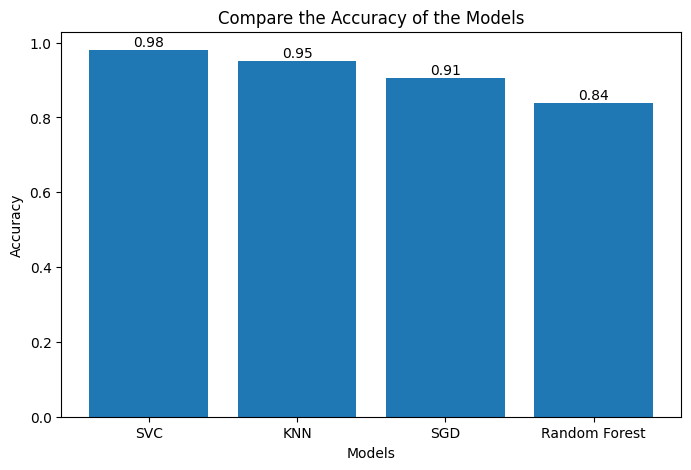

In [31]:
models = ['SVC', 'KNN', 'SGD', 'Random Forest']
accuracies = [svc_accuracy, knn_accuracy, sgd_accuracy, forest_accuracy] 


plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Compare the Accuracy of the Models')


for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()

### Precision

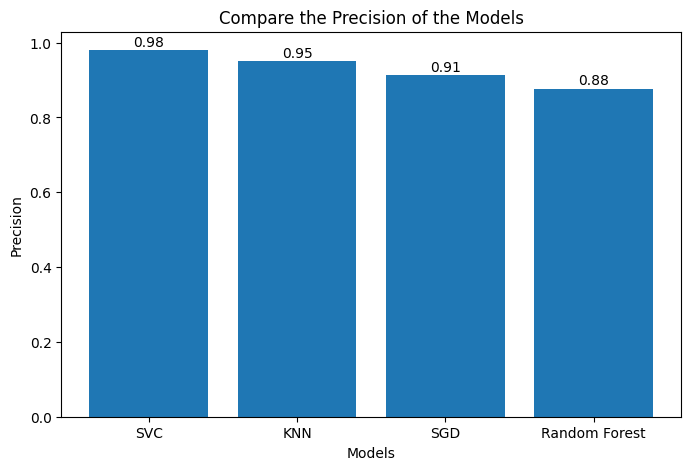

In [32]:
models = ['SVC', 'KNN', 'SGD', 'Random Forest']
precisions = [svc_precision, knn_precision, sgd_precision, forest_precision] 


plt.figure(figsize=(8, 5))
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Compare the Precision of the Models')


for i, v in enumerate(precisions):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()

### Recall

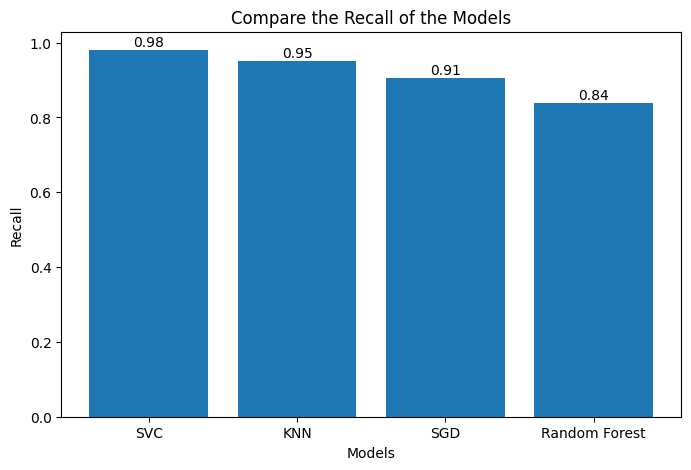

In [33]:
models = ['SVC', 'KNN', 'SGD', 'Random Forest']
recalls = [svc_recall, knn_recall, sgd_recall, forest_recall] 


plt.figure(figsize=(8, 5))
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Compare the Recall of the Models')


for i, v in enumerate(recalls):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()

### F-1 Score

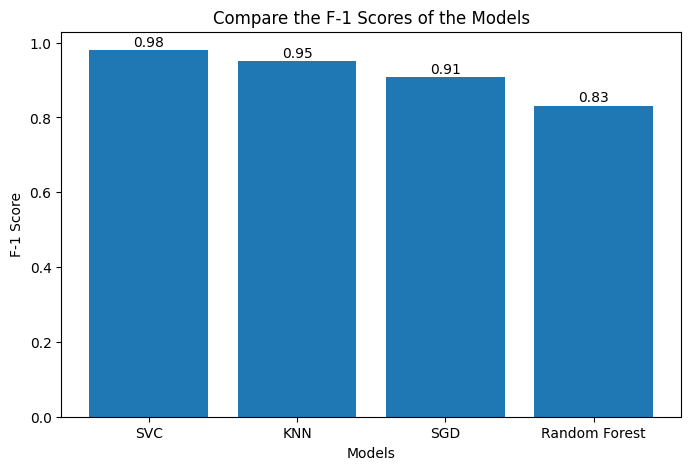

In [34]:
models = ['SVC', 'KNN', 'SGD', 'Random Forest']
f_1 = [svc_f1, knn_f1, sgd_f1, forest_f1] 


plt.figure(figsize=(8, 5))
plt.bar(models, f_1)
plt.xlabel('Models')
plt.ylabel('F-1 Score')
plt.title('Compare the F-1 Scores of the Models')


for i, v in enumerate(f_1):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()

### Compuatational Time

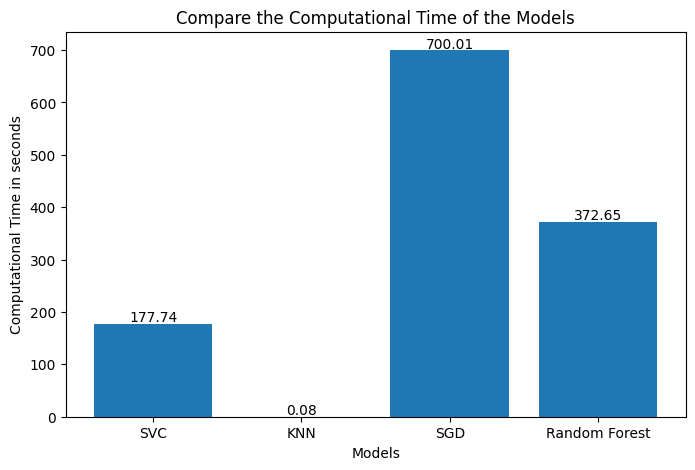

In [35]:
models = ['SVC', 'KNN', 'SGD', 'Random Forest']
computational_times = [computational_time_svc, computational_time_knn, computational_time_sgd, computational_time_forest] 


plt.figure(figsize=(8, 5))
plt.bar(models, computational_times)
plt.xlabel('Models')
plt.ylabel('Computational Time in seconds')
plt.title('Compare the Computational Time of the Models')


for i, v in enumerate(computational_times):
    plt.text(i, v + 4, f"{v:.2f}", ha='center')

plt.show()

### Precision, Recall and F-Score in one chart

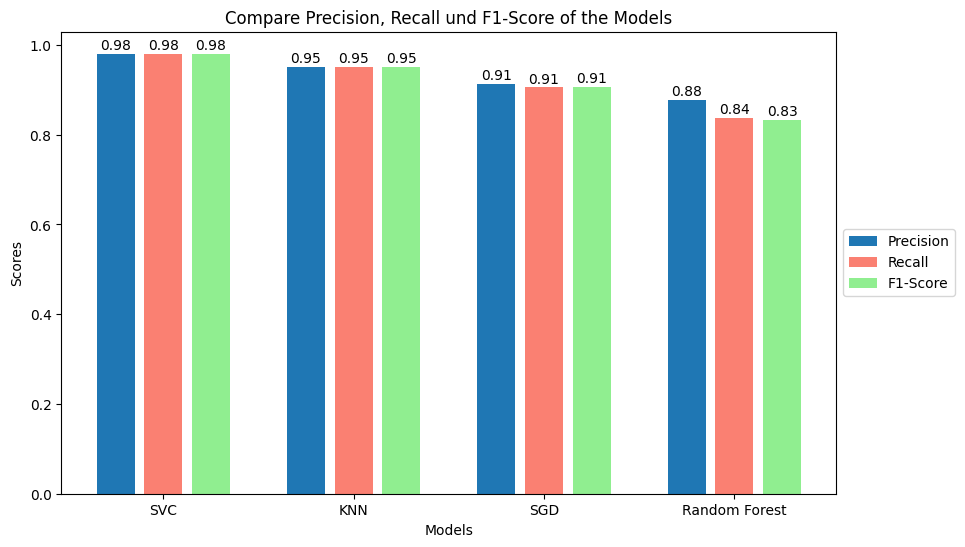

In [36]:
x = np.arange(len(models))
width = 0.2
spacing = 0.05

plt.figure(figsize=(10, 6))
plt.bar(x - width - spacing, precisions, width, label='Precision')
plt.bar(x, recalls, width, label='Recall', color='salmon')
plt.bar(x + width + spacing, f_1, width, label='F1-Score', color='lightgreen')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Compare Precision, Recall und F1-Score of the Models')
plt.xticks(x, models)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in range(len(models)):
    plt.text(x[i] - width- spacing, precisions[i] + 0.01, f"{precisions[i]:.2f}", ha='center')
    plt.text(x[i], recalls[i] + 0.01, f"{recalls[i]:.2f}", ha='center')
    plt.text(x[i] + width + spacing, f_1[i] + 0.01, f"{f_1[i]:.2f}", ha='center')

plt.show()